In [128]:
import numpy as np
import matplotlib.pyplot as plt

# 定义每个数字的 6x5 像素矩阵
digit_matrices = {
    0: [[1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]],
    1: [[-1, 1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, 1, 1, 1, -1]],
    2: [[1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1],
        [1, -1, -1, -1, -1],
        [1, -1, -1, -1, -1],
        [1, 1, 1, 1, 1]],
    3: [[1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]],
    4: [[1, -1, -1, 1, -1],
        [1, -1, -1, 1, -1],
        [1, -1, -1, 1, -1],
        [1, 1, 1, 1, 1],
        [-1, -1, -1, 1, -1],
        [-1, -1, -1, 1, -1]],
    5: [[1, 1, 1, 1, 1],
        [1, -1, -1, -1, -1],
        [1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]],
    6: [[1, 1, 1, 1, 1],
        [1, -1, -1, -1, -1],
        [1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]],
    7: [[1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1]],
    8: [[1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]],
    9: [[1, 1, 1, 1, 1],
        [1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1],
        [-1, -1, -1, -1, 1],
        [-1, -1, -1, -1, 1],
        [1, 1, 1, 1, 1]]
}

# 展开为1x30的矩阵
number_matrix_list = [np.array(digit_matrices[i]).flatten() for i in range(10)]

In [129]:
import numpy as np
import matplotlib.pyplot as plt
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))
    def train(self, patterns):
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights,0)
        self.weights/=len(patterns)
    def predict(self, pattern, iterations=10):
        result = pattern.copy()
        for _ in range(iterations):
            for i in range(self.size):
                net_input = np.dot(self.weights[i, :], result)
                result[i] = 1 if net_input > 0 else -1
        return result
    def visualize(self, pattern):
        plt.imshow(pattern.reshape(6, 5))
        plt.show()


In [130]:
# 初始化网络
hn = HopfieldNetwork(size=30)

# 训练网络
hn.train(number_matrix_list)


In [131]:
def add_noise_to_digit(digit_matrix, noise_level=0):
    """ 在数字矩阵中添加噪声 """
    noisy_digit = digit_matrix.copy()
    noise_indices = np.random.choice(np.arange(30), noise_level, replace=False)
    noisy_digit[noise_indices] *= -1  # 反转选定像素
    return noisy_digit


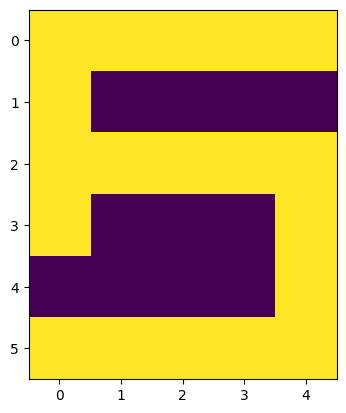

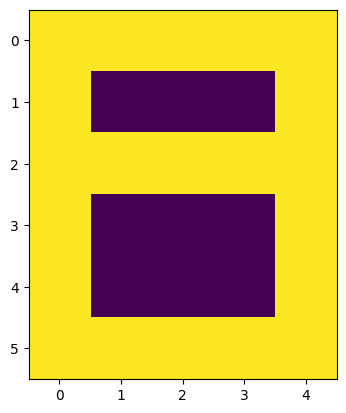

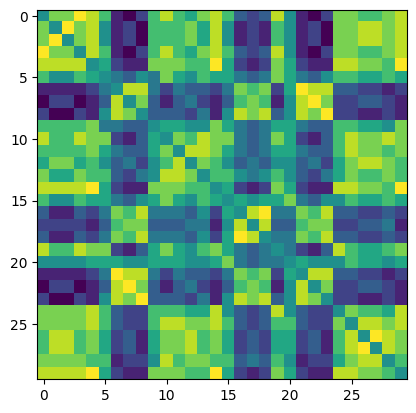

In [134]:
# 生成并显示带噪声的数字
noisy_digit = add_noise_to_digit(number_matrix_list[8], noise_level=2)
hn.visualize(noisy_digit)

# 使用网络进行识别并显示结果
recovered_digit = hn.predict(noisy_digit)
hn.visualize(recovered_digit)
plt.imshow(hn.weights)
